A1.

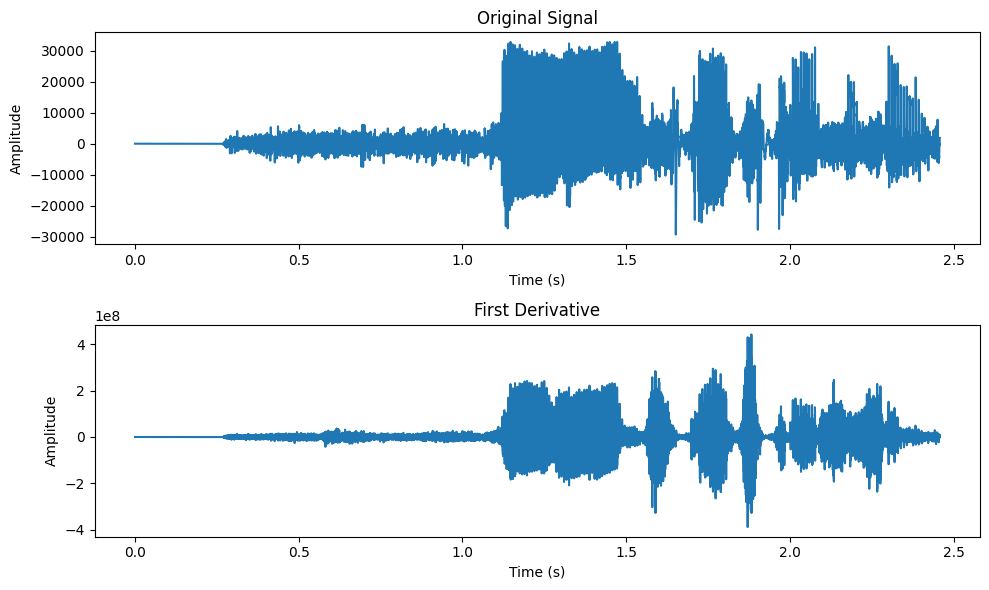

In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# Function to compute the first derivative using finite difference method
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

# Load the WAV file
file_path = '/content/adithya.wav'
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Plot the original signal and its derivative
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


A2.

Compare:
Signal Difference
Length
Sampling rate

Average length between zero crossings for speech: 9.43728 samples
Average length between zero crossings for silence: 8.28513209668353 samples


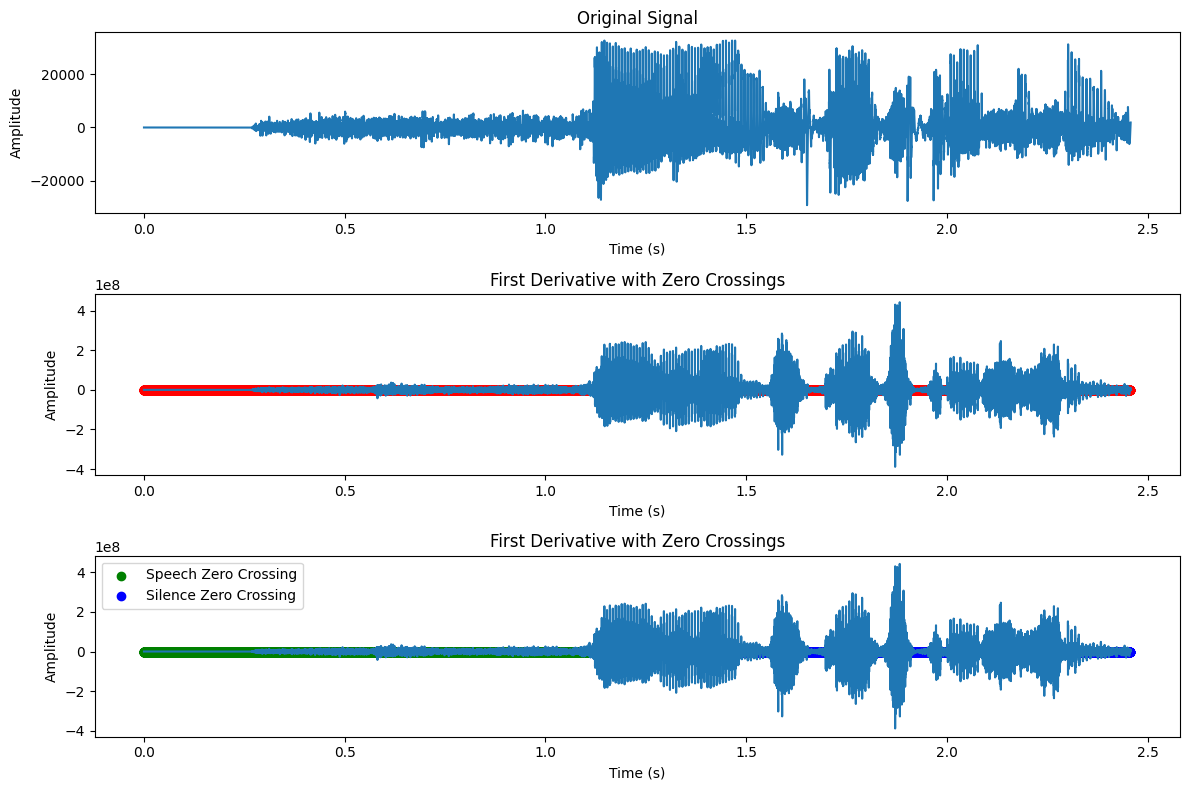

In [3]:
def finite_difference(signal, sampling_rate):
    dt = 1.0 / sampling_rate
    derivative = np.diff(signal) / dt
    return np.concatenate(([0], derivative))

def zero_crossings(derivative):
    return np.where(np.diff(np.sign(derivative)))[0]

def calculate_average_length(zero_crossings):
    return np.mean(np.diff(zero_crossings))

# Load the WAV file
file_path = '/content/adithya.wav'
sampling_rate, signal = wavfile.read(file_path)

# Compute the first derivative
derivative = finite_difference(signal, sampling_rate)

# Detect zero crossings
zero_crossings_indices = zero_crossings(derivative)

# Plot the original signal and its derivative with zero crossings
time = np.arange(0, len(signal)) / sampling_rate

plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(time, signal)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
time_derivative = np.arange(0, len(derivative)) / sampling_rate
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(zero_crossings_indices / sampling_rate, np.zeros_like(zero_crossings_indices), color='red', marker='o', label='Zero Crossing')

# Calculate average length between zero crossings for speech and silence
speech_zero_crossings = zero_crossings_indices[zero_crossings_indices < len(signal) / 2]
silence_zero_crossings = zero_crossings_indices[zero_crossings_indices >= len(signal) / 2]

average_length_speech = calculate_average_length(speech_zero_crossings)
average_length_silence = calculate_average_length(silence_zero_crossings)

print(f"Average length between zero crossings for speech: {average_length_speech} samples")
print(f"Average length between zero crossings for silence: {average_length_silence} samples")

plt.subplot(3, 1, 3)
plt.plot(time_derivative, derivative)
plt.title('First Derivative with Zero Crossings')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.scatter(speech_zero_crossings / sampling_rate, np.zeros_like(speech_zero_crossings), color='green', marker='o', label='Speech Zero Crossing')
plt.scatter(silence_zero_crossings / sampling_rate, np.zeros_like(silence_zero_crossings), color='blue', marker='o', label='Silence Zero Crossing')
plt.legend()

plt.tight_layout()
plt.show()


A3.

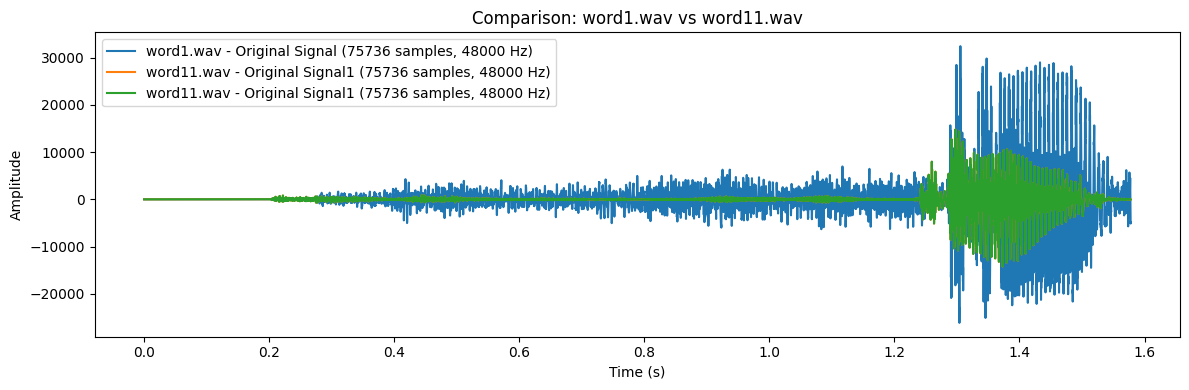

File: word1.wav, Average length between zero crossings for speech: 8.69276693455798 samples
File: word1.wav, Sampling Rate: 48000 Hz
File1: word11.wav, Sampling Rate1: 48000 Hz


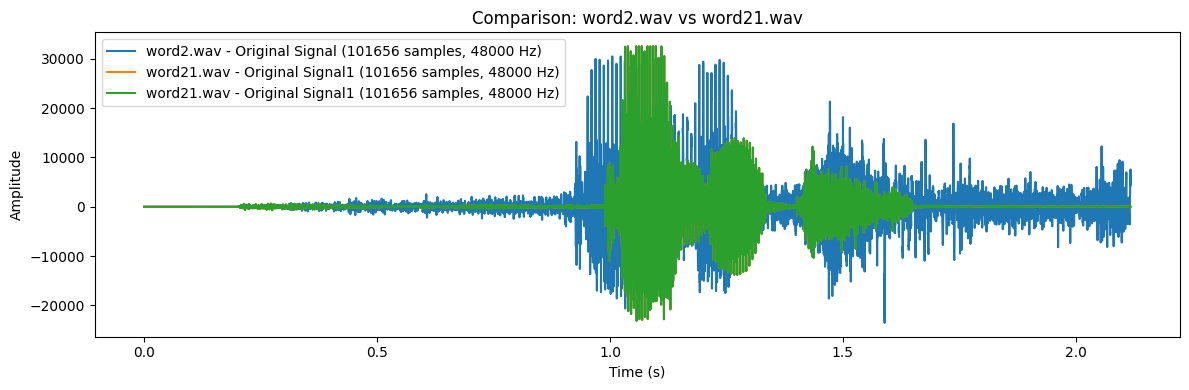

File: word2.wav, Average length between zero crossings for speech: 8.173563033327966 samples
File: word2.wav, Sampling Rate: 48000 Hz
File1: word21.wav, Sampling Rate1: 48000 Hz


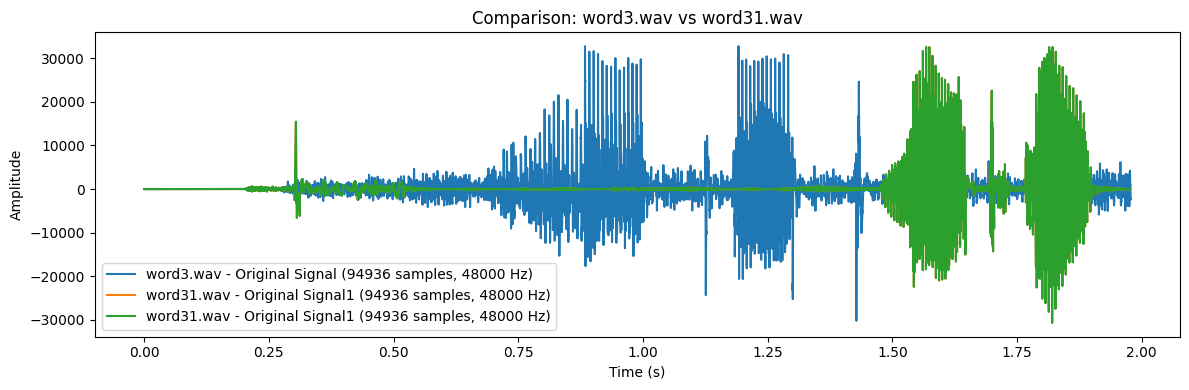

File: word3.wav, Average length between zero crossings for speech: 8.71858927259368 samples
File: word3.wav, Sampling Rate: 48000 Hz
File1: word31.wav, Sampling Rate1: 48000 Hz


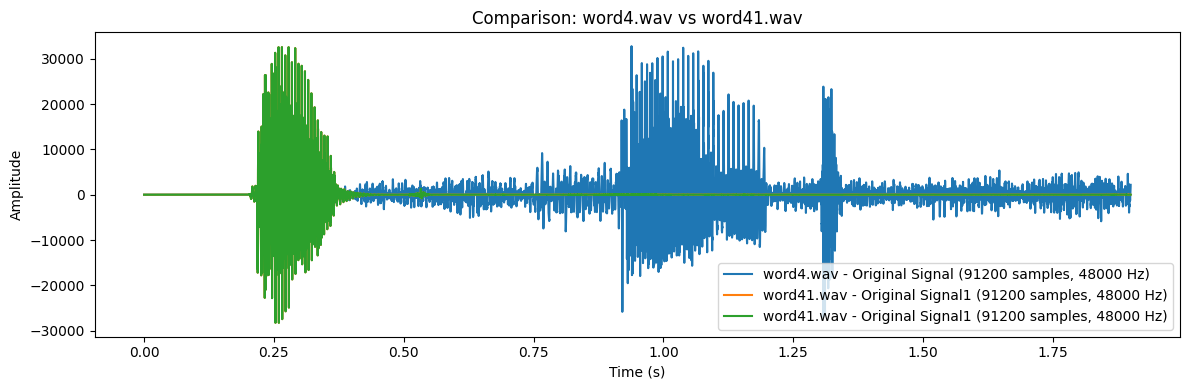

File: word4.wav, Average length between zero crossings for speech: 8.529180695847362 samples
File: word4.wav, Sampling Rate: 48000 Hz
File1: word41.wav, Sampling Rate1: 48000 Hz


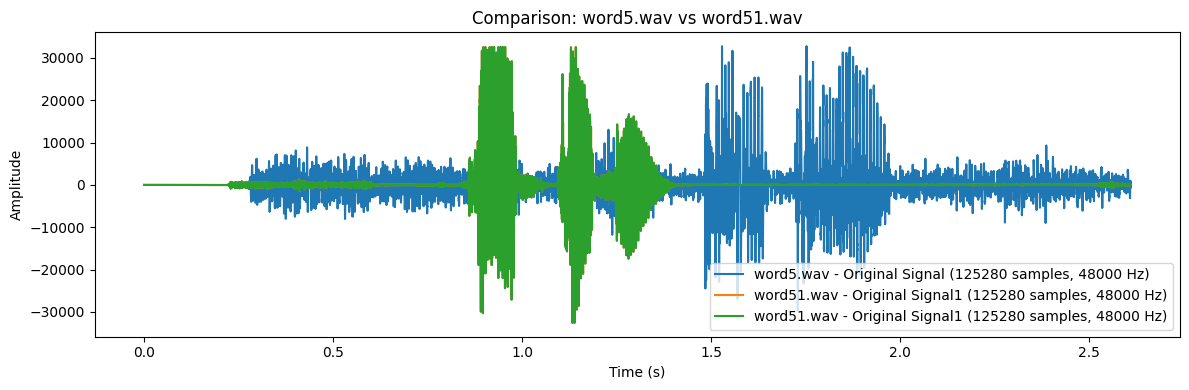

File: word5.wav, Average length between zero crossings for speech: 11.316874660879002 samples
File: word5.wav, Sampling Rate: 48000 Hz
File1: word51.wav, Sampling Rate1: 48000 Hz


In [23]:
# Load the WAV files for 5 speech signals
file_paths = ['word1.wav', 'word2.wav', 'word3.wav', 'word4.wav', 'word5.wav']
file_paths1 = ['word11.wav', 'word21.wav', 'word31.wav', 'word41.wav', 'word51.wav']

# Compare each pair of corresponding files
for i, (file_path, file_path1) in enumerate(zip(file_paths, file_paths1), 1):
    # Load the first WAV file
    sampling_rate, signal = wavfile.read(file_path)

    # Load the second WAV file
    sampling_rate1, signal1 = wavfile.read(file_path1)

    # Ensure both signals have the same length
    min_length = min(len(signal), len(signal1))
    signal = signal[:min_length]
    signal1 = signal1[:min_length]

    # Compute the first derivative for the first file
    derivative = finite_difference(signal, sampling_rate)

    # Detect zero crossings for the first file
    zero_crossings_indices = zero_crossings(derivative)

    # Calculate average length between zero crossings for speech for the first file
    speech_zero_crossings = zero_crossings_indices[zero_crossings_indices < len(signal) / 2]
    average_length_speech = calculate_average_length(speech_zero_crossings)

    # Plot the original signals for both files in the same graph
    time = np.arange(0, min_length) / sampling_rate

    plt.figure(figsize=(12, 4))
    plt.plot(time, signal, label=f'{file_path} - Original Signal ({len(signal)} samples, {sampling_rate} Hz)')
    plt.plot(time, signal1, label=f'{file_path1} - Original Signal1 ({len(signal1)} samples, {sampling_rate1} Hz)')
    plt.title(f'Comparison: {file_path} vs {file_path1}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"File: {file_path}, Average length between zero crossings for speech: {average_length_speech} samples")
    print(f"File: {file_path}, Sampling Rate: {sampling_rate} Hz")
    print(f"File1: {file_path1}, Sampling Rate1: {sampling_rate1} Hz")


A4.

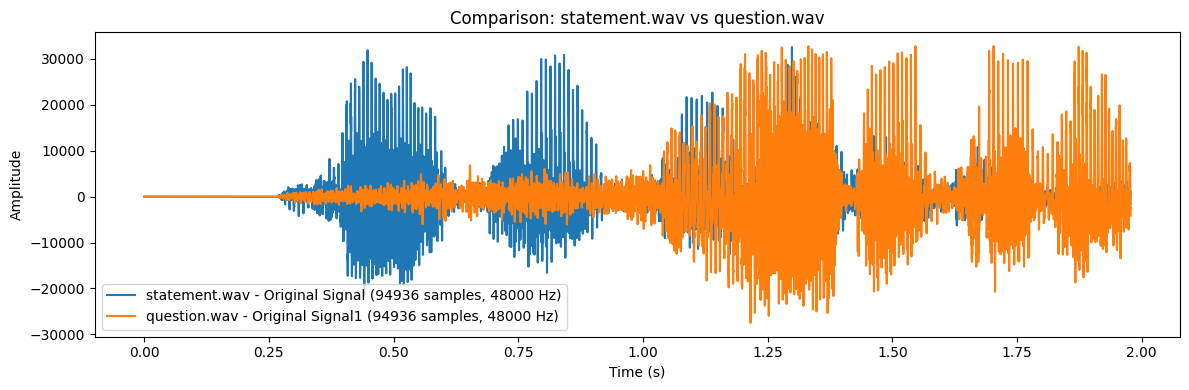

File: statement.wav, Average length between zero crossings for speech: 9.297551420176298 samples
File: statement.wav, Sampling Rate: 48000 Hz
File1: question.wav, Sampling Rate1: 48000 Hz


In [24]:
# Load the WAV files for 2 speech signals
file_path = 'statement.wav'
file_path1 = 'question.wav'

# Load the first WAV file
sampling_rate, signal = wavfile.read(file_path)

# Load the second WAV file
sampling_rate1, signal1 = wavfile.read(file_path1)

# Ensure both signals have the same length
min_length = min(len(signal), len(signal1))
signal = signal[:min_length]
signal1 = signal1[:min_length]

# Compute the first derivative for the first file
derivative = finite_difference(signal, sampling_rate)

# Detect zero crossings for the first file
zero_crossings_indices = zero_crossings(derivative)

# Calculate average length between zero crossings for speech for the first file
speech_zero_crossings = zero_crossings_indices[zero_crossings_indices < len(signal) / 2]
average_length_speech = calculate_average_length(speech_zero_crossings)

# Plot the original signals for both files in the same graph
time = np.arange(0, min_length) / sampling_rate

plt.figure(figsize=(12, 4))
plt.plot(time, signal, label=f'{file_path} - Original Signal ({len(signal)} samples, {sampling_rate} Hz)')
plt.plot(time, signal1, label=f'{file_path1} - Original Signal1 ({len(signal1)} samples, {sampling_rate1} Hz)')
plt.title(f'Comparison: {file_path} vs {file_path1}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

print(f"File: {file_path}, Average length between zero crossings for speech: {average_length_speech} samples")
print(f"File: {file_path}, Sampling Rate: {sampling_rate} Hz")
print(f"File1: {file_path1}, Sampling Rate1: {sampling_rate1} Hz")
